# BUILT Models

In [ ]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import joblib
from data_preprocessing import *

## Unificazione dati OMI per la provincia di Verona (2023-2024)


### 📌 PASSO 1: Caricare i file CSV
6 file: 3 file "valori" e 3 file "zone", uno per ciascun semestre.

✅ Obiettivo: Scrivere una funzione per caricare i file in un DataFrame, gestendo la rimozione della prima riga di intestazione

Sto organizzando i dati di Verona suddivisi per semestre (2023 e 2024). Ogni file contiene informazioni sui prezzi immobiliari e sulla suddivisione delle zone.

In [ ]:
# Caricamento di tutti i file
df_valori_list = [carica_csv(files_valori[sem], sem) for sem in files_valori]
df_zone_list = [carica_csv(files_zone[sem], sem) for sem in files_zone]

# Creiamo due DataFrame unificati
df_valori = pd.concat(df_valori_list, ignore_index=True)
df_zone = pd.concat(df_zone_list, ignore_index=True)

# Verifichiamo i dati caricati
print("\n Prime righe del dataset VALORI:\n", df_valori.head())
print("\n Prime righe del dataset ZONE:\n", df_zone.head())


 Prime righe del dataset VALORI:
   area_territoriale regione prov  comune_istat comune_cat sez comune_amm  \
0          NORD-EST  VENETO   VR       5023091       D6AA           L781   
1          NORD-EST  VENETO   VR       5023091       D6AA           L781   
2          NORD-EST  VENETO   VR       5023091       D6AA           L781   
3          NORD-EST  VENETO   VR       5023091       D6AA           L781   
4          NORD-EST  VENETO   VR       5023091       D6AA           L781   

  comune_descrizione fascia zona  ...               descr_tipologia    stato  \
0             VERONA      B   B2  ...             Abitazioni civili  NORMALE   
1             VERONA      B   B2  ...             Abitazioni civili   OTTIMO   
2             VERONA      B   B2  ...  Abitazioni di tipo economico  NORMALE   
3             VERONA      B   B2  ...                        Negozi  NORMALE   
4             VERONA      B   B2  ...                        Uffici  NORMALE   

  stato_prev compr_min comp

- I dati "valori" contengono informazioni sulle quotazioni immobiliari, cioè prezzi di compravendita e locazione.
- I dati "zone" contengono informazioni geografiche sulle zone OMI e le tipologie di immobili predominanti.

### 📌 PASSO 2: Pulizia dei Dati
✅ Obiettivo: Creare una funzione per pulire i dati

In [5]:
# Pulizia del dataset VALORI
df_valori_pulito = pulisci_dati(df_valori)

# Pulizia del dataset ZONE
df_zone_pulito = pulisci_dati(df_zone)

# Controllo dei dati dopo la pulizia
print("\n Controllo valori mancanti dopo la pulizia (VALORI):\n", df_valori_pulito.isnull().sum())
print("\n Controllo valori mancanti dopo la pulizia (ZONE):\n", df_zone_pulito.isnull().sum())

# Controllo dei tipi di dati dopo la conversione
print("\n Tipi di dati dopo la conversione (VALORI):\n", df_valori_pulito.dtypes)
print("\n Tipi di dati dopo la conversione (ZONE):\n", df_zone_pulito.dtypes)



 Controllo valori mancanti dopo la pulizia (VALORI):
 area_territoriale     0
regione               0
prov                  0
comune_istat          0
comune_cat            0
sez                   0
comune_amm            0
comune_descrizione    0
fascia                0
zona                  0
linkzona              0
cod_tip               0
descr_tipologia       0
stato                 0
stato_prev            0
compr_min             0
compr_max             0
sup_nl_compr          0
loc_min               0
loc_max               0
sup_nl_loc            0
semestre              0
dtype: int64

 Controllo valori mancanti dopo la pulizia (ZONE):
 area_territoriale     0
regione               0
prov                  0
comune_istat          0
comune_cat            0
sez                   0
comune_amm            0
comune_descrizione    0
fascia                0
zona_descr            0
zona                  0
linkzona              0
cod_tip_prev          0
descr_tip_prev        0
stato_prev     

C:\Users\emmal\AppData\Local\Temp\ipykernel_18232\1959722814.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Imputazione con mediana per numeri
C:\Users\emmal\AppData\Local\Temp\ipykernel_18232\1959722814.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

Sono stati ripuliti i dati correggendo i numeri e riempendo eventuali valori mancanti in modo da evitare errori nelle analisi.
I dati sono completi e corretti per poter proseguire nell'analisi.

### 📌 PASSO 3: Analisi delle Colonne
✅ Obiettivi:
1. Stampare l’elenco delle colonne disponibili nei due dataset.
2. Capire il significato di ciascuna colonna e la sua utilità.
3. Decidere quali colonne eliminare.

In [6]:
# Stampa i nomi delle colonne disponibili nei dataset
print("\n Colonne presenti nel dataset VALORI:\n", df_valori_pulito.columns.tolist())
print("\n Colonne presenti nel dataset ZONE:\n", df_zone_pulito.columns.tolist())

# Conta quante colonne ha ogni dataset
print("\n Numero di colonne nel dataset VALORI:", len(df_valori_pulito.columns))
print(" Numero di colonne nel dataset ZONE:", len(df_zone_pulito.columns))

# Analisi della presenza di valori unici per colonna (per identificare colonne ridondanti)
print("\n Numero di valori unici per colonna nel dataset VALORI:\n", df_valori_pulito.nunique())
print("\n Numero di valori unici per colonna nel dataset ZONE:\n", df_zone_pulito.nunique())

# Visualizza statistiche descrittive per tutte le colonne numeriche
print("\n Statistiche descrittive per il dataset VALORI:\n", df_valori_pulito.describe())
print("\n Statistiche descrittive per il dataset ZONE:\n", df_zone_pulito.describe())


 Colonne presenti nel dataset VALORI:
 ['area_territoriale', 'regione', 'prov', 'comune_istat', 'comune_cat', 'sez', 'comune_amm', 'comune_descrizione', 'fascia', 'zona', 'linkzona', 'cod_tip', 'descr_tipologia', 'stato', 'stato_prev', 'compr_min', 'compr_max', 'sup_nl_compr', 'loc_min', 'loc_max', 'sup_nl_loc', 'semestre']

 Colonne presenti nel dataset ZONE:
 ['area_territoriale', 'regione', 'prov', 'comune_istat', 'comune_cat', 'sez', 'comune_amm', 'comune_descrizione', 'fascia', 'zona_descr', 'zona', 'linkzona', 'cod_tip_prev', 'descr_tip_prev', 'stato_prev', 'microzona', 'semestre']

 Numero di colonne nel dataset VALORI: 22
 Numero di colonne nel dataset ZONE: 17

 Numero di valori unici per colonna nel dataset VALORI:
 area_territoriale       1
regione                 1
prov                    1
comune_istat           98
comune_cat             98
sez                     1
comune_amm             98
comune_descrizione     98
fascia                  5
zona                   23
lin

Ho verificato quali dati sono disponibili e analizzato le informazioni chiave (media, deviazione standard, percentili, valore minimo e massimo). Viene valutato se ci sono eventuali anomalie nel dataset, che non sono presenti.

### 📌 PASSO 4: Eliminazione delle Colonne con un Solo Valore Unico
✅ Obiettivi:

1. Identificare automaticamente le colonne con un solo valore unico.
2. Scrivere una funzione per eliminare queste colonne in qualsiasi dataset.
3. Applicare la funzione ai dataset df_valori_pulito e df_zone_pulito.


In [8]:
# Eliminazione colonne con un solo valore unico
df_valori_pulito = rimuovi_colonne_uniche(df_valori_pulito)
df_zone_pulito = rimuovi_colonne_uniche(df_zone_pulito)

# Controllo delle colonne rimanenti
print("\n Colonne rimanenti nel dataset VALORI:\n", df_valori_pulito.columns.tolist())
print("\n Colonne rimanenti nel dataset ZONE:\n", df_zone_pulito.columns.tolist())


 Colonne rimosse: ['area_territoriale', 'regione', 'prov', 'sez', 'sup_nl_compr']

 Colonne rimosse: ['area_territoriale', 'regione', 'prov', 'sez']

 Colonne rimanenti nel dataset VALORI:
 ['comune_istat', 'comune_cat', 'comune_amm', 'comune_descrizione', 'fascia', 'zona', 'linkzona', 'cod_tip', 'descr_tipologia', 'stato', 'stato_prev', 'compr_min', 'compr_max', 'loc_min', 'loc_max', 'sup_nl_loc', 'semestre']

 Colonne rimanenti nel dataset ZONE:
 ['comune_istat', 'comune_cat', 'comune_amm', 'comune_descrizione', 'fascia', 'zona_descr', 'zona', 'linkzona', 'cod_tip_prev', 'descr_tip_prev', 'stato_prev', 'microzona', 'semestre']


Vengono eliminate le colonne contenenti solo valori unici (un valore fisso per ogni riga) perchè non aggiungono informazioni rilevanti all'analisi.
Vengono mantenute quindi solamente le informazioni essenziali, eliminando dati rindondati o inutili.

### 📌 PASSO 5: Preparare l'unione tra i dataset

In [9]:
# Controlla le colonne disponibili in entrambi i dataset
print("\n Colonne nel dataset VALORI:\n", df_valori_pulito.columns.tolist())
print("\n Colonne nel dataset ZONE:\n", df_zone_pulito.columns.tolist())

# Trova le colonne in comune (potenziali chiavi di unione)
colonne_comuni = list(set(df_valori_pulito.columns) & set(df_zone_pulito.columns))
print("\n Colonne in comune tra i due dataset (possibili chiavi di join):\n", colonne_comuni)


 Colonne nel dataset VALORI:
 ['comune_istat', 'comune_cat', 'comune_amm', 'comune_descrizione', 'fascia', 'zona', 'linkzona', 'cod_tip', 'descr_tipologia', 'stato', 'stato_prev', 'compr_min', 'compr_max', 'loc_min', 'loc_max', 'sup_nl_loc', 'semestre']

 Colonne nel dataset ZONE:
 ['comune_istat', 'comune_cat', 'comune_amm', 'comune_descrizione', 'fascia', 'zona_descr', 'zona', 'linkzona', 'cod_tip_prev', 'descr_tip_prev', 'stato_prev', 'microzona', 'semestre']

 Colonne in comune tra i due dataset (possibili chiavi di join):
 ['comune_amm', 'zona', 'semestre', 'fascia', 'comune_istat', 'linkzona', 'comune_cat', 'stato_prev', 'comune_descrizione']


### 📌 PASSO 6: Unire i dataset

In [10]:
# Unione dei dataset basata sulle colonne comuni
df_unificato = pd.merge(df_valori_pulito, df_zone_pulito, on=["zona", "linkzona", "semestre"], how="left")

# Controllo del dataset unificato
print("\n Dataset unificato, prime righe:\n", df_unificato.head())

# Controllo di eventuali valori NaN dopo l'unione
print("\n Valori mancanti nel dataset unificato:\n", df_unificato.isnull().sum())



 Dataset unificato, prime righe:
    comune_istat_x comune_cat_x comune_amm_x comune_descrizione_x fascia_x  \
0       5023091.0         D6AA         L781               VERONA        B   
1       5023091.0         D6AA         L781               VERONA        B   
2       5023091.0         D6AA         L781               VERONA        B   
3       5023091.0         D6AA         L781               VERONA        B   
4       5023091.0         D6AA         L781               VERONA        B   

  zona    linkzona  cod_tip               descr_tipologia    stato  ...  \
0   B2  VR00000844     20.0             Abitazioni civili  NORMALE  ...   
1   B2  VR00000844     20.0             Abitazioni civili   OTTIMO  ...   
2   B2  VR00000844     21.0  Abitazioni di tipo economico  NORMALE  ...   
3   B2  VR00000844      5.0                        Negozi  NORMALE  ...   
4   B2  VR00000844      6.0                        Uffici  NORMALE  ...   

  comune_istat_y  comune_cat_y  comune_amm_y  comun

In [11]:
# Salvataggio del dataset pulito
df_unificato.to_csv(os.path.join(cartella_dati, "DatiOMI_Unificato.csv"), index=False, sep=";")
print("\n✅ Dataset unificato salvato con successo!")


✅ Dataset unificato salvato con successo!


Ho creato un unico dataset (unendo i dati su zone e valori) che collega i prezzi degli immobili alle zone di Verona, permettendo di analizzare al meglio il mercato immobiliare.

## Analisi esplorativa del dataset

### 📌 PASSO 1: Analisi Strutturale del Dataset
✅ Obiettivo: Capire la struttura e le caratteristiche generali del dataset.

In [12]:
# Dimensione del dataset
print("\n Il dataset contiene:", df_unificato.shape[0], "righe e", df_unificato.shape[1], "colonne.")

# Visualizzare le prime righe per un'anteprima
print("\n Prime righe del dataset:")
print(df_unificato.head())

# Tipi di dati
print("\n Tipi di dati per ogni colonna:")
print(df_unificato.dtypes)

# Statistiche descrittive per colonne numeriche
print("\n Statistiche descrittive per le colonne numeriche:")
print(df_unificato.describe())

# Statistiche per le colonne categoriche
print("\n Distribuzione delle variabili categoriche:")
for col in df_unificato.select_dtypes(exclude=["number"]).columns:
    print(f"\n {col}:")
    print(df_unificato[col].value_counts())

# Nuova analisi: Distribuzione del numero di osservazioni per comune
print("\n Numero di osservazioni per comune:")
print(df_unificato["comune_descrizione_x"].value_counts())



 Il dataset contiene: 3498 righe e 27 colonne.

 Prime righe del dataset:
   comune_istat_x comune_cat_x comune_amm_x comune_descrizione_x fascia_x  \
0       5023091.0         D6AA         L781               VERONA        B   
1       5023091.0         D6AA         L781               VERONA        B   
2       5023091.0         D6AA         L781               VERONA        B   
3       5023091.0         D6AA         L781               VERONA        B   
4       5023091.0         D6AA         L781               VERONA        B   

  zona    linkzona  cod_tip               descr_tipologia    stato  ...  \
0   B2  VR00000844     20.0             Abitazioni civili  NORMALE  ...   
1   B2  VR00000844     20.0             Abitazioni civili   OTTIMO  ...   
2   B2  VR00000844     21.0  Abitazioni di tipo economico  NORMALE  ...   
3   B2  VR00000844      5.0                        Negozi  NORMALE  ...   
4   B2  VR00000844      6.0                        Uffici  NORMALE  ...   

  comune_is

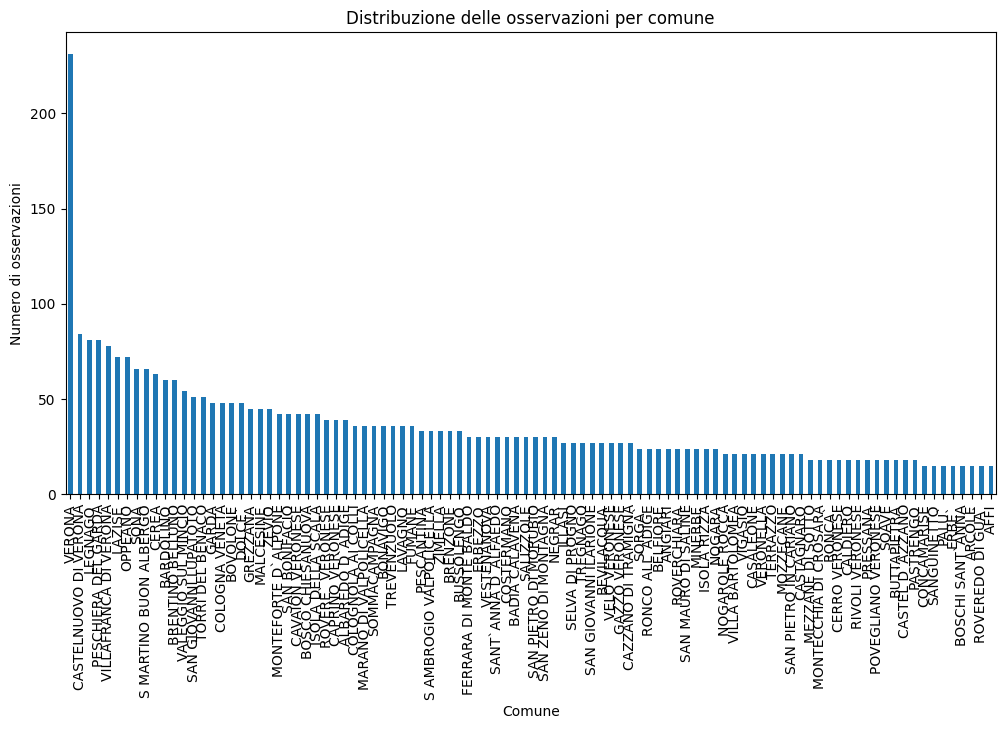

In [13]:
# Visualizzazione grafica della distribuzione dei dati nei comuni
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_unificato["comune_descrizione_x"].value_counts().plot(kind="bar")
plt.title("Distribuzione delle osservazioni per comune")
plt.xlabel("Comune")
plt.ylabel("Numero di osservazioni")
plt.xticks(rotation=90)
plt.show()

Viene verificato che il dataset contenga tutte le informazioni necessarie. In particolare:

Il numero di record (immobili analizzati).
Le statistiche sui prezzi medi, massimi e minimi per compravendita e locazione.
La distribuzione delle zone e delle altre variabili testuali.

Grafico a barre della distribuzione delle osservazioni per comune, utile per visualizzare rapidamente la presenza dei dati nei diversi comuni della provincia.

### 📌 PASSO 2: Analisi delle distribuzioni
✅ Obiettivo: Capire la distribuzioni delle colonne

C:\Users\emmal\AppData\Local\Temp\ipykernel_18232\1471194526.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="comune_descrizione_x", y="compr_max", data=df_top, palette="coolwarm")


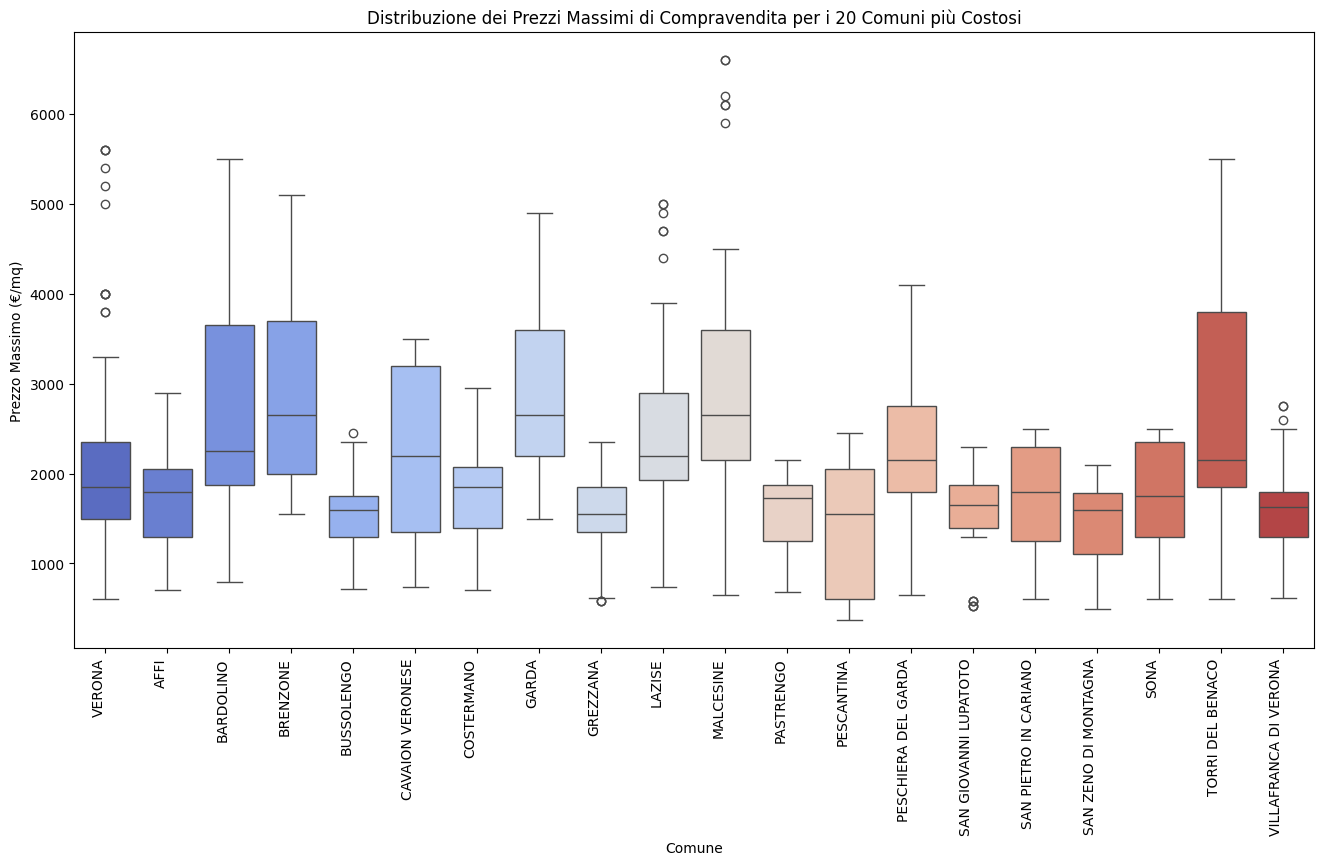

C:\Users\emmal\AppData\Local\Temp\ipykernel_18232\1471194526.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prezzi_comuni.index[:20], y=prezzi_comuni.values[:20], palette="coolwarm")


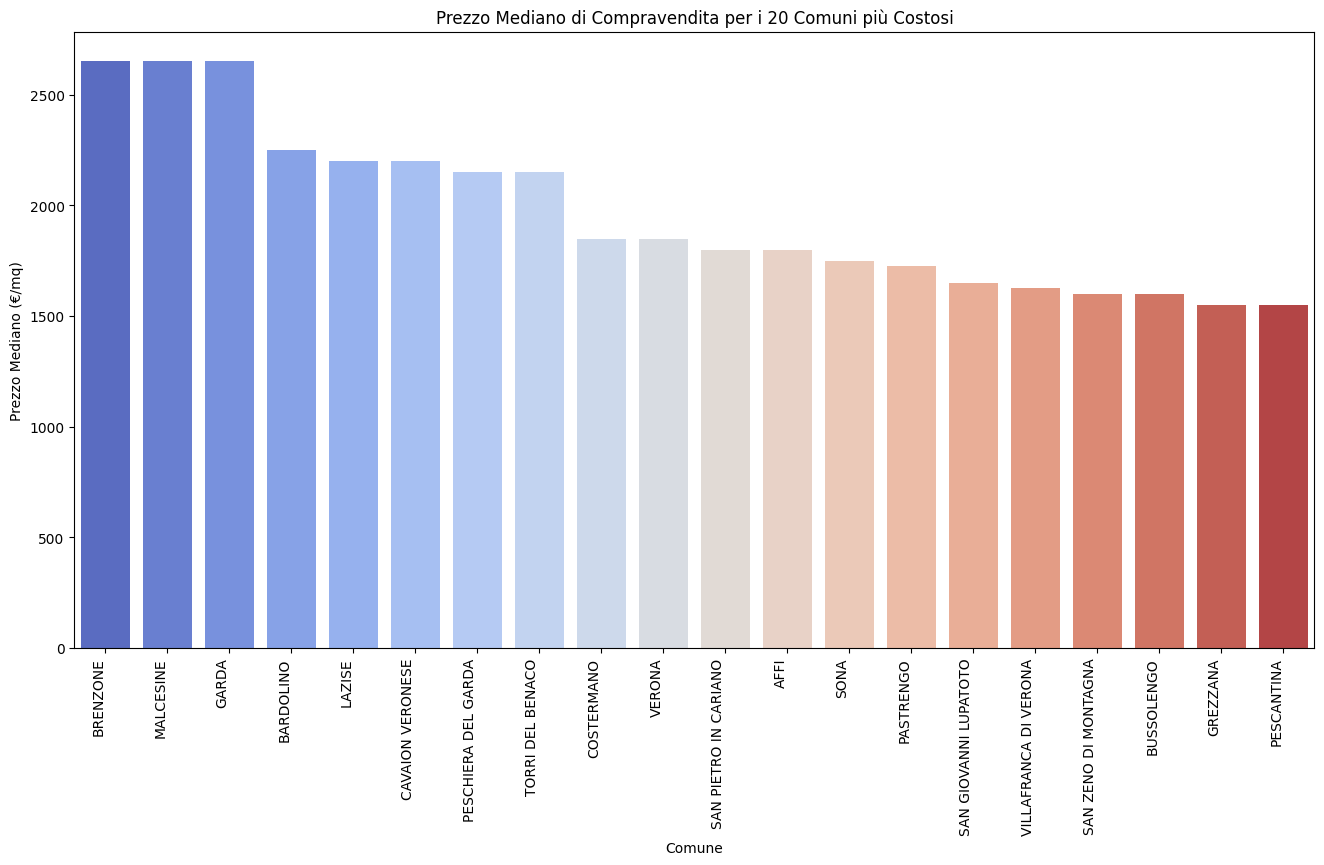

C:\Users\emmal\AppData\Local\Temp\ipykernel_18232\1471194526.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="comune_descrizione_x", y="compr_max", data=df_bottom, palette="coolwarm")


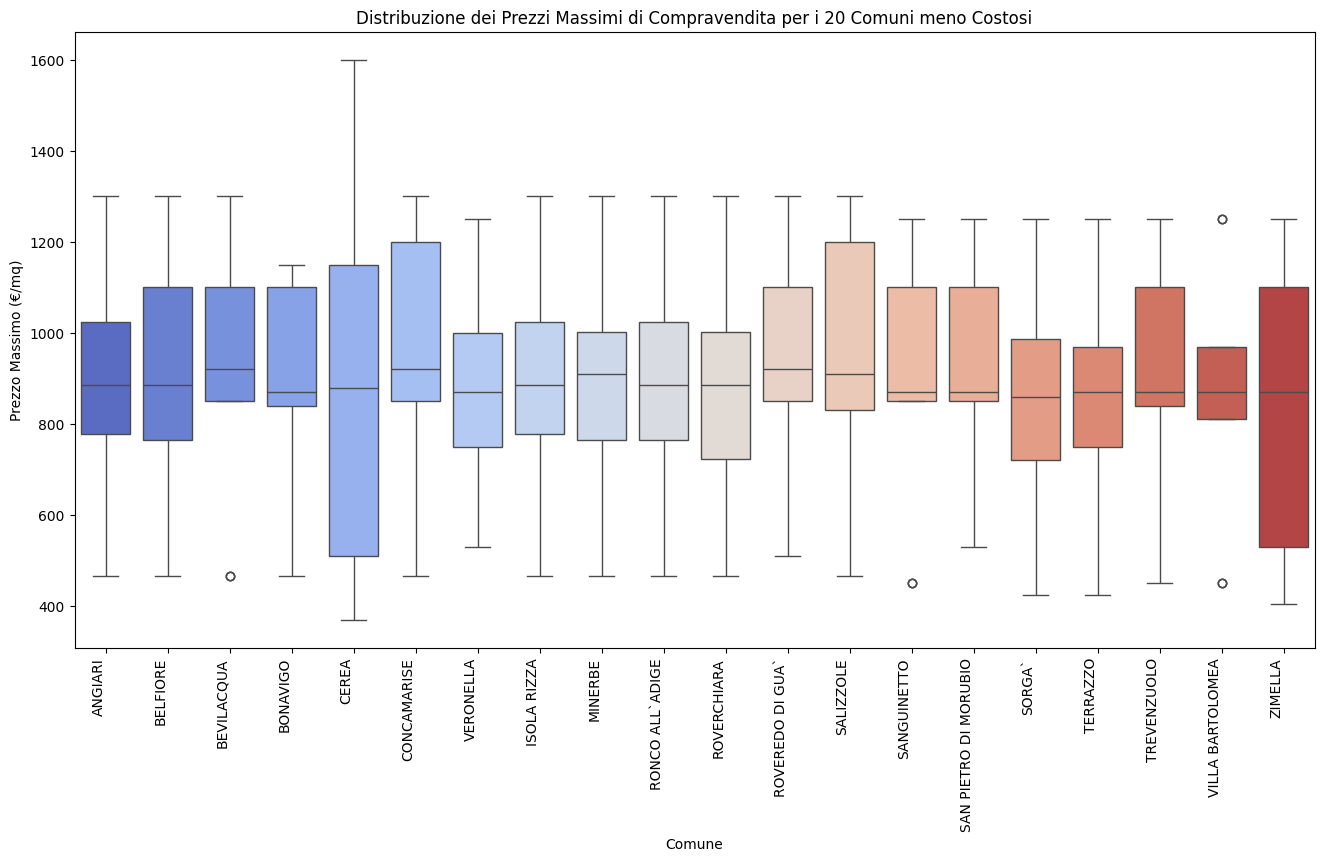

C:\Users\emmal\AppData\Local\Temp\ipykernel_18232\1471194526.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prezzi_comuni.index[-20:], y=prezzi_comuni.values[-20:], palette="coolwarm")


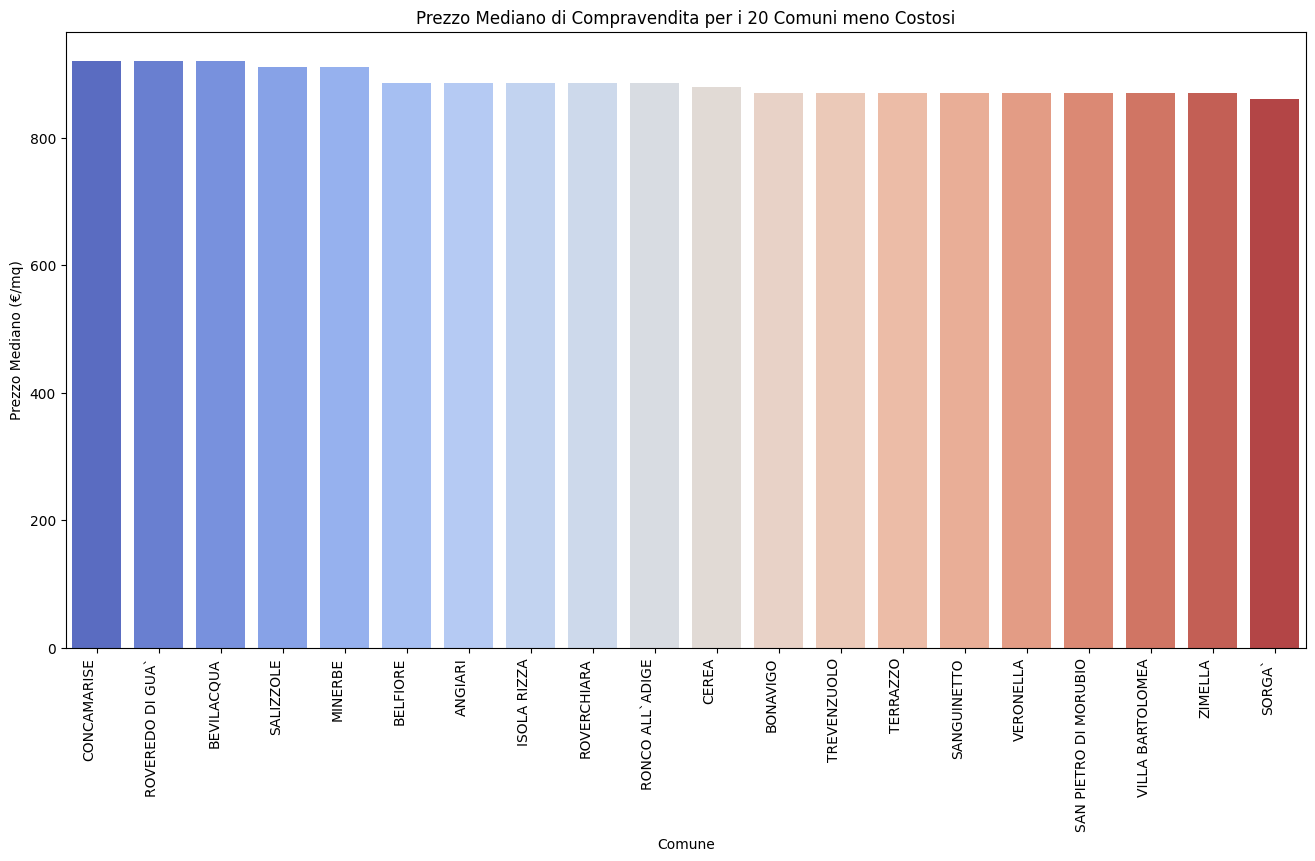

In [14]:
# Filtriamo solo i dati validi
df_filtrato = df_unificato.dropna(subset=["compr_max", "comune_descrizione_x"])

# Calcoliamo la mediana dei prezzi per comune
prezzi_comuni = df_filtrato.groupby("comune_descrizione_x")["compr_max"].median().sort_values(ascending=False)

# Selezioniamo solo i 20 comuni con il prezzo mediano più alto
top_comuni = prezzi_comuni.head(20).index
df_top = df_filtrato[df_filtrato["comune_descrizione_x"].isin(top_comuni)]

# Selezioniamo solo i 20 comuni con il prezzo mediano più basso
bottom_comuni = prezzi_comuni.tail(20).index
df_bottom = df_filtrato[df_filtrato["comune_descrizione_x"].isin(bottom_comuni)]

# 1. Distribuzione dei Prezzi Massimi di Compravendita per i 20 Comuni più Costosi
plt.figure(figsize=(16, 8))
sns.boxplot(x="comune_descrizione_x", y="compr_max", data=df_top, palette="coolwarm")
plt.xticks(rotation=90, ha='right')
plt.title("Distribuzione dei Prezzi Massimi di Compravendita per i 20 Comuni più Costosi")
plt.xlabel("Comune")
plt.ylabel("Prezzo Massimo (€/mq)")
plt.show()

# 2. Prezzo Mediano di Compravendita per i 20 Comuni più Costosi
plt.figure(figsize=(16, 8))
sns.barplot(x=prezzi_comuni.index[:20], y=prezzi_comuni.values[:20], palette="coolwarm")
plt.xticks(rotation=90, ha='right')
plt.title("Prezzo Mediano di Compravendita per i 20 Comuni più Costosi")
plt.xlabel("Comune")
plt.ylabel("Prezzo Mediano (€/mq)")
plt.show()

# 3. Distribuzione dei Prezzi Massimi di Compravendita per i 20 Comuni meno Costosi
plt.figure(figsize=(16, 8))
sns.boxplot(x="comune_descrizione_x", y="compr_max", data=df_bottom, palette="coolwarm")
plt.xticks(rotation=90, ha='right')
plt.title("Distribuzione dei Prezzi Massimi di Compravendita per i 20 Comuni meno Costosi")
plt.xlabel("Comune")
plt.ylabel("Prezzo Massimo (€/mq)")
plt.show()

# 4. Prezzo Mediano di Compravendita per i 20 Comuni meno Costosi
plt.figure(figsize=(16, 8))
sns.barplot(x=prezzi_comuni.index[-20:], y=prezzi_comuni.values[-20:], palette="coolwarm")
plt.xticks(rotation=90, ha='right')
plt.title("Prezzo Mediano di Compravendita per i 20 Comuni meno Costosi")
plt.xlabel("Comune")
plt.ylabel("Prezzo Mediano (€/mq)")
plt.show()

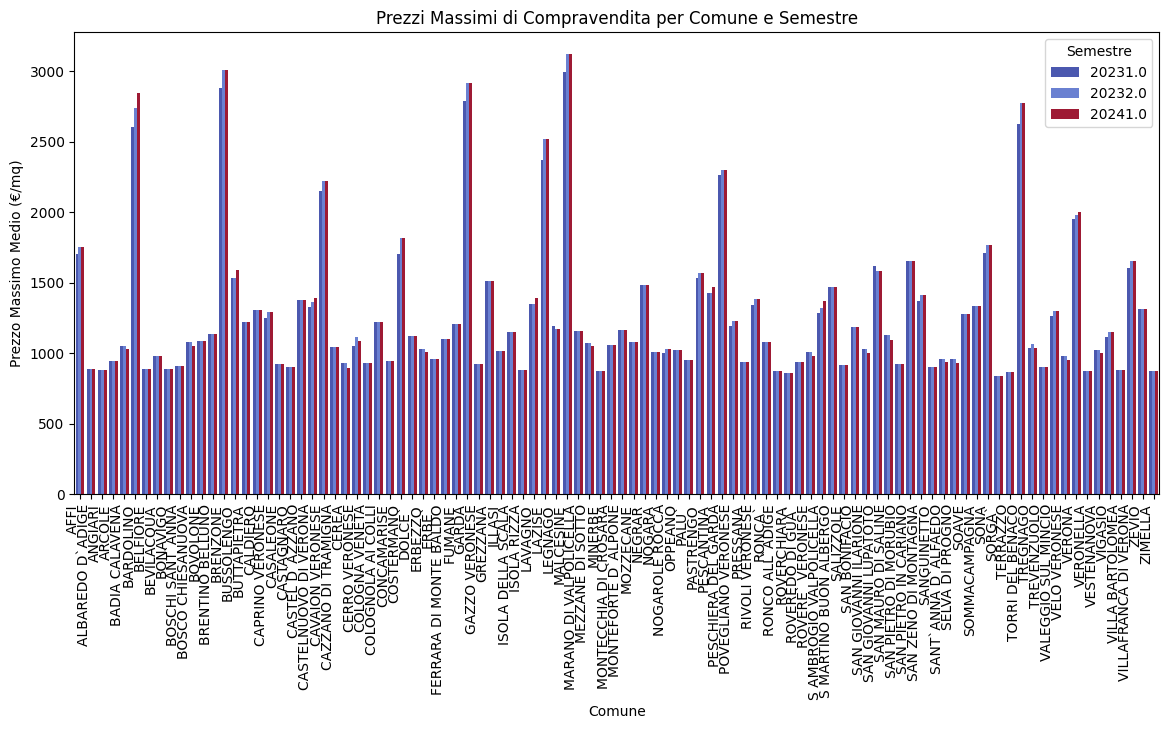

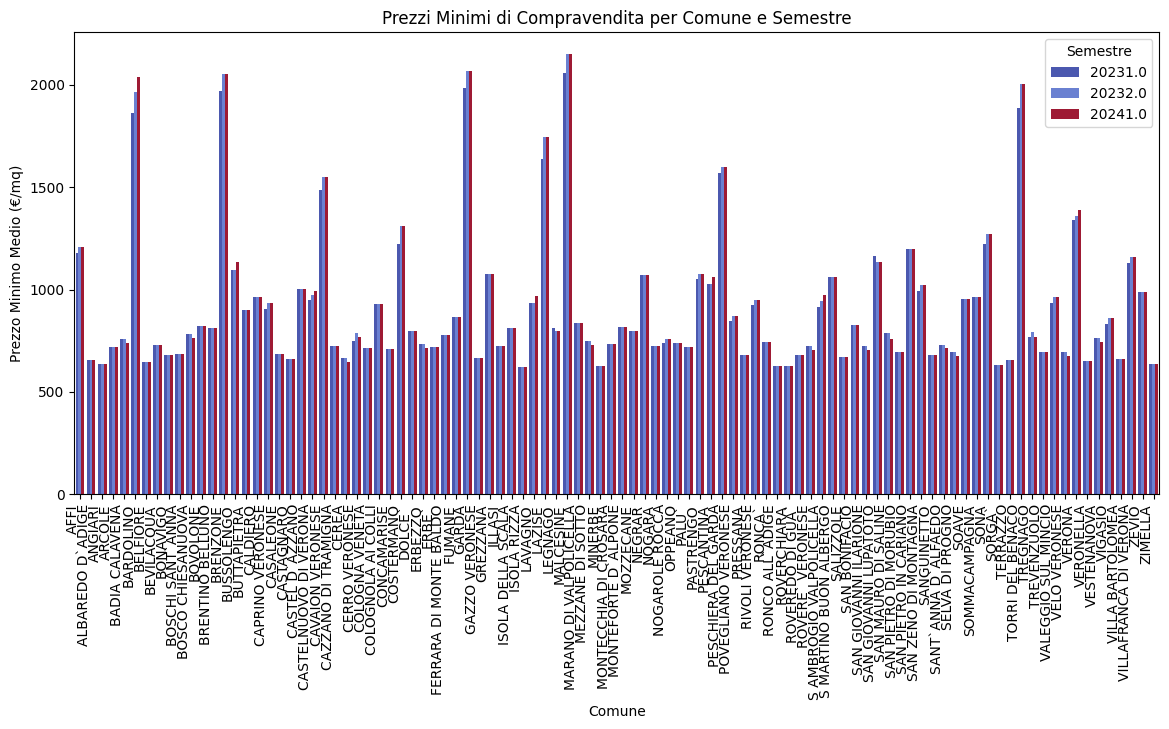

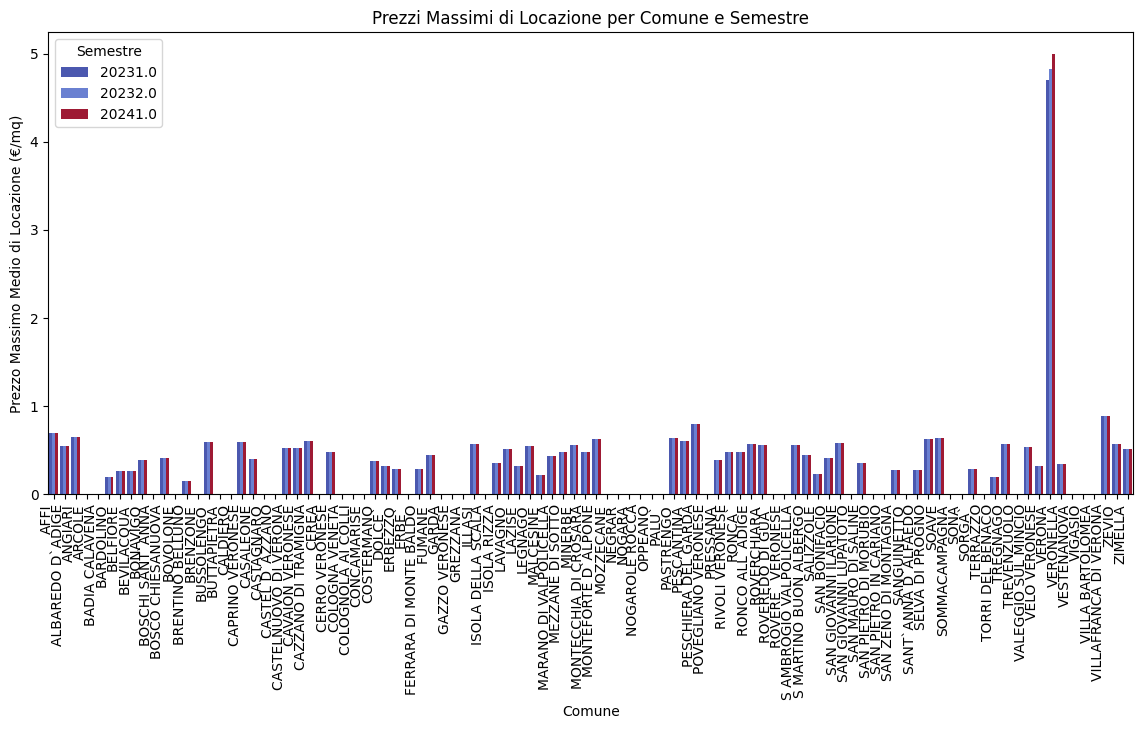

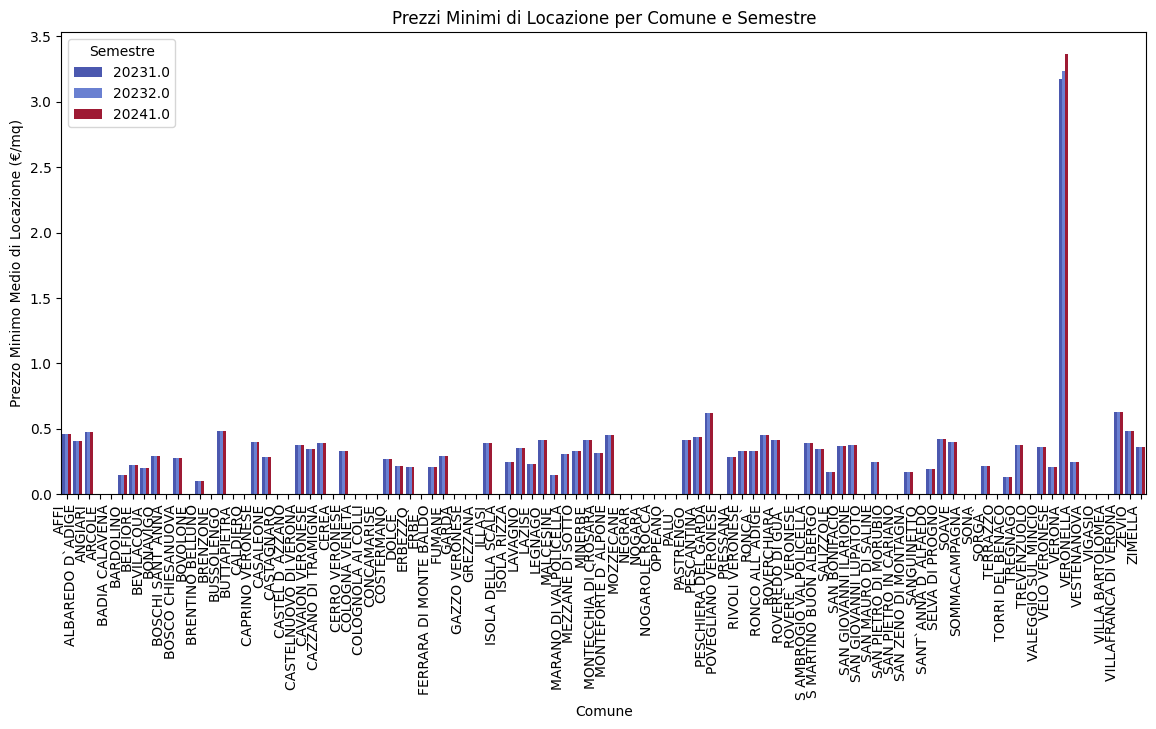

In [15]:
# Filtriamo solo i dati validi
df_filtrato = df_unificato.dropna(subset=["compr_max", "compr_min", "loc_max", "loc_min", "semestre", "comune_descrizione_x"])

# 3. EVOLUZIONE TEMPORALE DEI PREZZI DI COMPRAVENDITA PER COMUNE
df_aggregato = df_filtrato.groupby(["comune_descrizione_x", "semestre"]).agg({
    "compr_max": "mean",
    "compr_min": "mean",
    "loc_max": "mean",
    "loc_min": "mean"
}).reset_index()

# Creazione del grafico a barre per i prezzi massimi di compravendita
plt.figure(figsize=(14, 6))
sns.barplot(data=df_aggregato, x="comune_descrizione_x", y="compr_max", hue="semestre", palette="coolwarm")
plt.title("Prezzi Massimi di Compravendita per Comune e Semestre")
plt.xlabel("Comune")
plt.ylabel("Prezzo Massimo Medio (€/mq)")
plt.legend(title="Semestre")
plt.xticks(rotation=90, ha='right')
plt.show()

# Creazione del grafico a barre per i prezzi minimi di compravendita
plt.figure(figsize=(14, 6))
sns.barplot(data=df_aggregato, x="comune_descrizione_x", y="compr_min", hue="semestre", palette="coolwarm")
plt.title("Prezzi Minimi di Compravendita per Comune e Semestre")
plt.xlabel("Comune")
plt.ylabel("Prezzo Minimo Medio (€/mq)")
plt.legend(title="Semestre")
plt.xticks(rotation=90, ha='right')
plt.show()

# Creazione del grafico a barre per i prezzi massimi di locazione
plt.figure(figsize=(14, 6))
sns.barplot(data=df_aggregato, x="comune_descrizione_x", y="loc_max", hue="semestre", palette="coolwarm")
plt.title("Prezzi Massimi di Locazione per Comune e Semestre")
plt.xlabel("Comune")
plt.ylabel("Prezzo Massimo Medio di Locazione (€/mq)")
plt.legend(title="Semestre")
plt.xticks(rotation=90, ha='right')
plt.show()

# Creazione del grafico a barre per i prezzi minimi di locazione
plt.figure(figsize=(14, 6))
sns.barplot(data=df_aggregato, x="comune_descrizione_x", y="loc_min", hue="semestre", palette="coolwarm")
plt.title("Prezzi Minimi di Locazione per Comune e Semestre")
plt.xlabel("Comune")
plt.ylabel("Prezzo Minimo Medio di Locazione (€/mq)")
plt.legend(title="Semestre")
plt.xticks(rotation=90, ha='right')
plt.show()


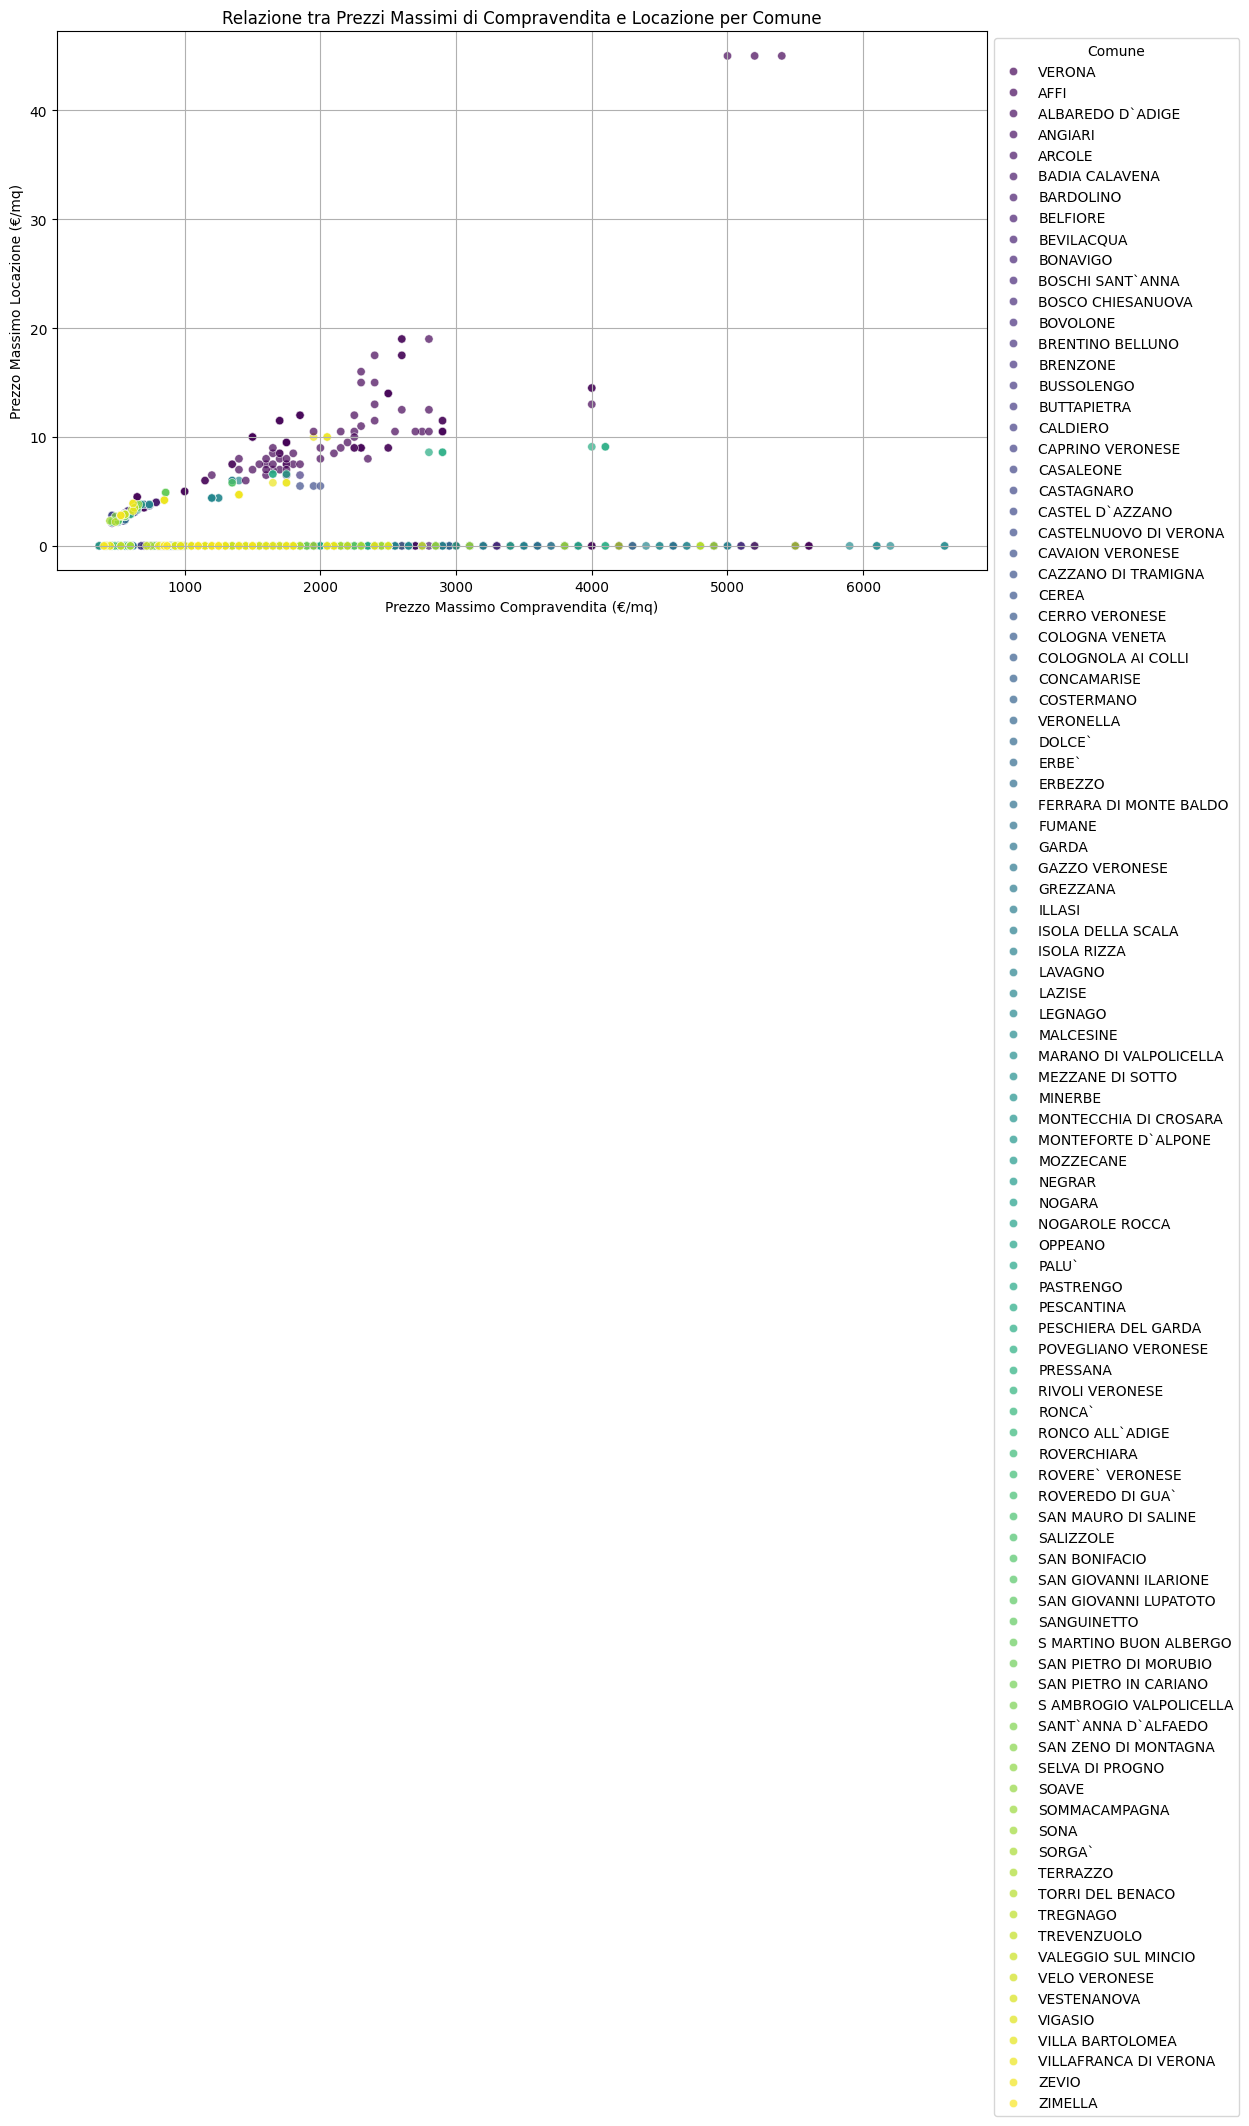

In [16]:
# Filtriamo solo i dati validi
df_filtrato = df_unificato.dropna(subset=["compr_max", "loc_max", "comune_descrizione_x"])

# 4. RELAZIONE TRA PREZZI DI COMPRAVENDITA E LOCAZIONE PER COMUNE
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_filtrato, x="compr_max", y="loc_max", hue="comune_descrizione_x", alpha=0.7, palette="viridis")
plt.title("Relazione tra Prezzi Massimi di Compravendita e Locazione per Comune")
plt.xlabel("Prezzo Massimo Compravendita (€/mq)")
plt.ylabel("Prezzo Massimo Locazione (€/mq)")
plt.legend(title="Comune", bbox_to_anchor=(1, 1), ncol=1)
plt.grid(True)
plt.show()


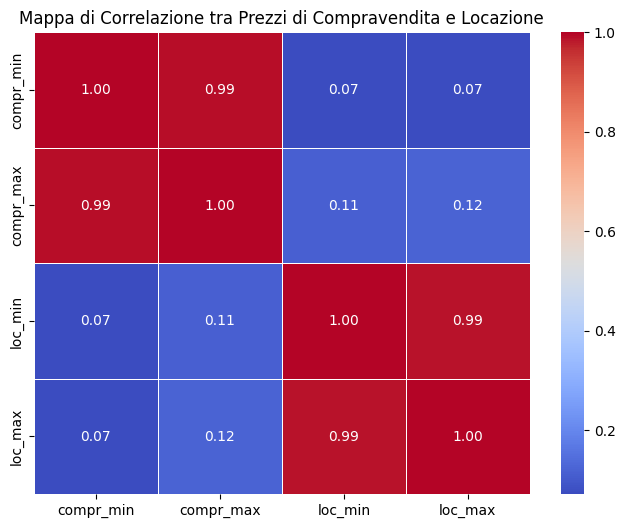

In [17]:
# Filtriamo solo le colonne di interesse e rimuoviamo eventuali NaN
df_corr = df_unificato[["compr_min", "compr_max", "loc_min", "loc_max"]].dropna()

# 5. HEATMAP DI CORRELAZIONE TRA PREZZI
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Mappa di Correlazione tra Prezzi di Compravendita e Locazione")
plt.show()


C:\Users\emmal\AppData\Local\Temp\ipykernel_18232\2238008684.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="descr_tipologia", y="compr_max", data=df_filtrato, palette="magma")


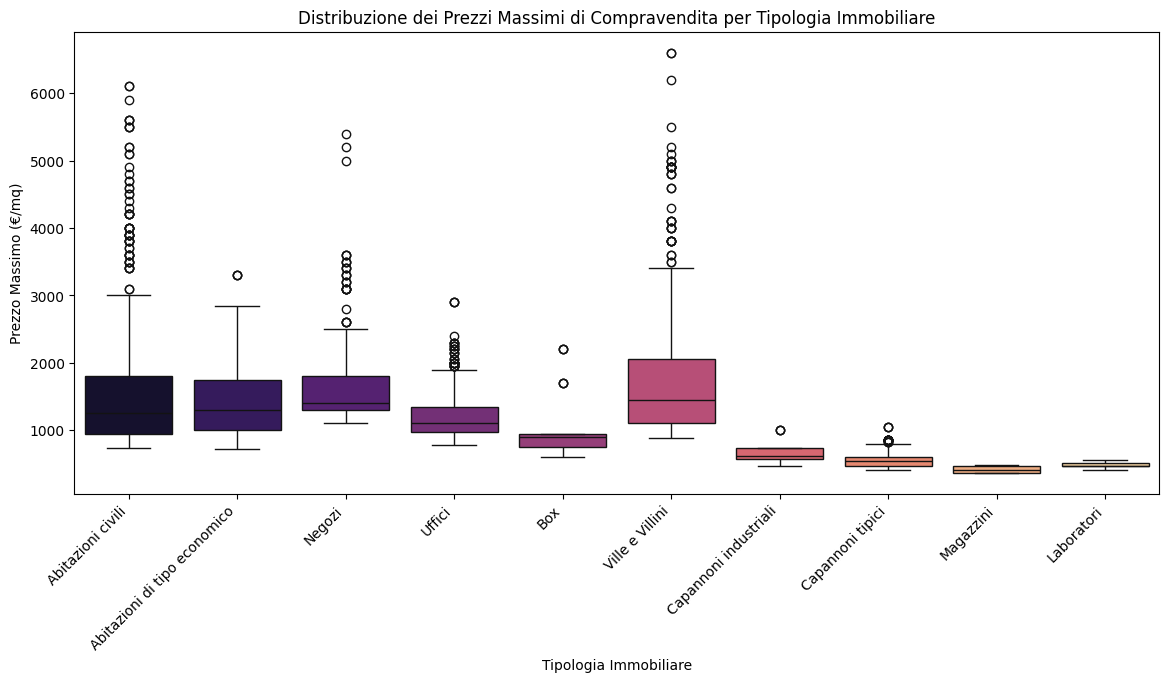

In [18]:
# Filtriamo solo i dati validi
df_filtrato = df_unificato.dropna(subset=["compr_max", "descr_tipologia", "comune_descrizione_x"])

# 6. DISTRIBUZIONE PREZZI PER TIPOLOGIA IMMOBILIARE (TUTTA LA PROVINCIA)
plt.figure(figsize=(14, 6))
sns.boxplot(x="descr_tipologia", y="compr_max", data=df_filtrato, palette="magma")
plt.xticks(rotation=45, ha='right')
plt.title("Distribuzione dei Prezzi Massimi di Compravendita per Tipologia Immobiliare")
plt.xlabel("Tipologia Immobiliare")
plt.ylabel("Prezzo Massimo (€/mq)")
plt.show()


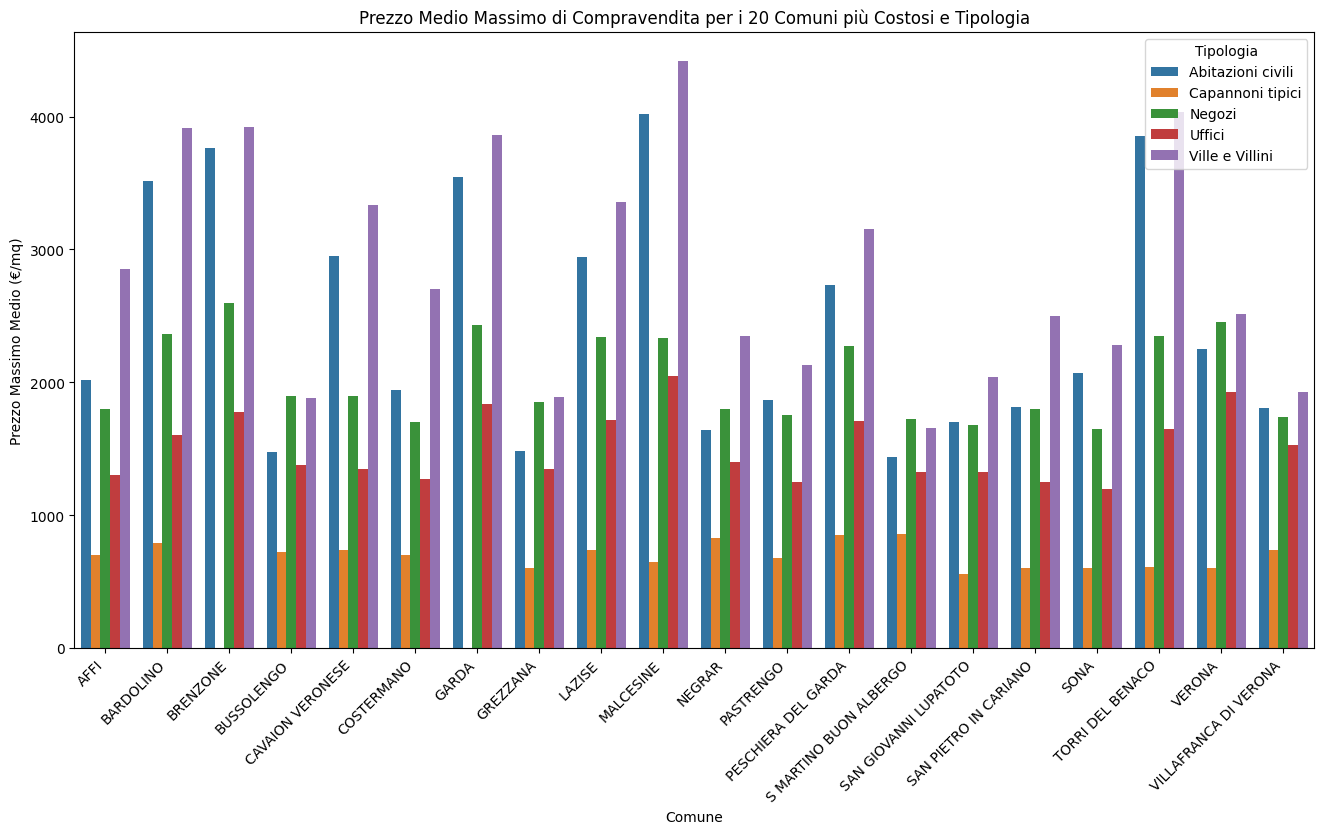

In [19]:
# Filtriamo solo i dati validi
df_filtrato = df_unificato.dropna(subset=["compr_max", "comune_descrizione_x", "descr_tipologia"])

# Calcolo dei prezzi medi per comune e tipologia
df_prezzi_tipologia = df_filtrato.groupby(["comune_descrizione_x", "descr_tipologia"]).agg({
    "compr_max": "mean"
}).reset_index()

# Selezioniamo solo i 20 comuni con il prezzo medio più alto
top_comuni = df_prezzi_tipologia.groupby("comune_descrizione_x")["compr_max"].mean().nlargest(20).index
df_top = df_prezzi_tipologia[df_prezzi_tipologia["comune_descrizione_x"].isin(top_comuni)]

# Selezioniamo solo le 5 tipologie più comuni
top_tipologie = df_top["descr_tipologia"].value_counts().nlargest(5).index
df_top = df_top[df_top["descr_tipologia"].isin(top_tipologie)]

# Grafico migliorato con solo i primi 20 comuni e le 5 tipologie più frequenti
plt.figure(figsize=(16, 8))
sns.barplot(data=df_top, x="comune_descrizione_x", y="compr_max", hue="descr_tipologia", palette="tab10")
plt.title("Prezzo Medio Massimo di Compravendita per i 20 Comuni più Costosi e Tipologia")
plt.xlabel("Comune")
plt.ylabel("Prezzo Massimo Medio (€/mq)")
plt.legend(title="Tipologia")
plt.xticks(rotation=45, ha='right')
plt.show()



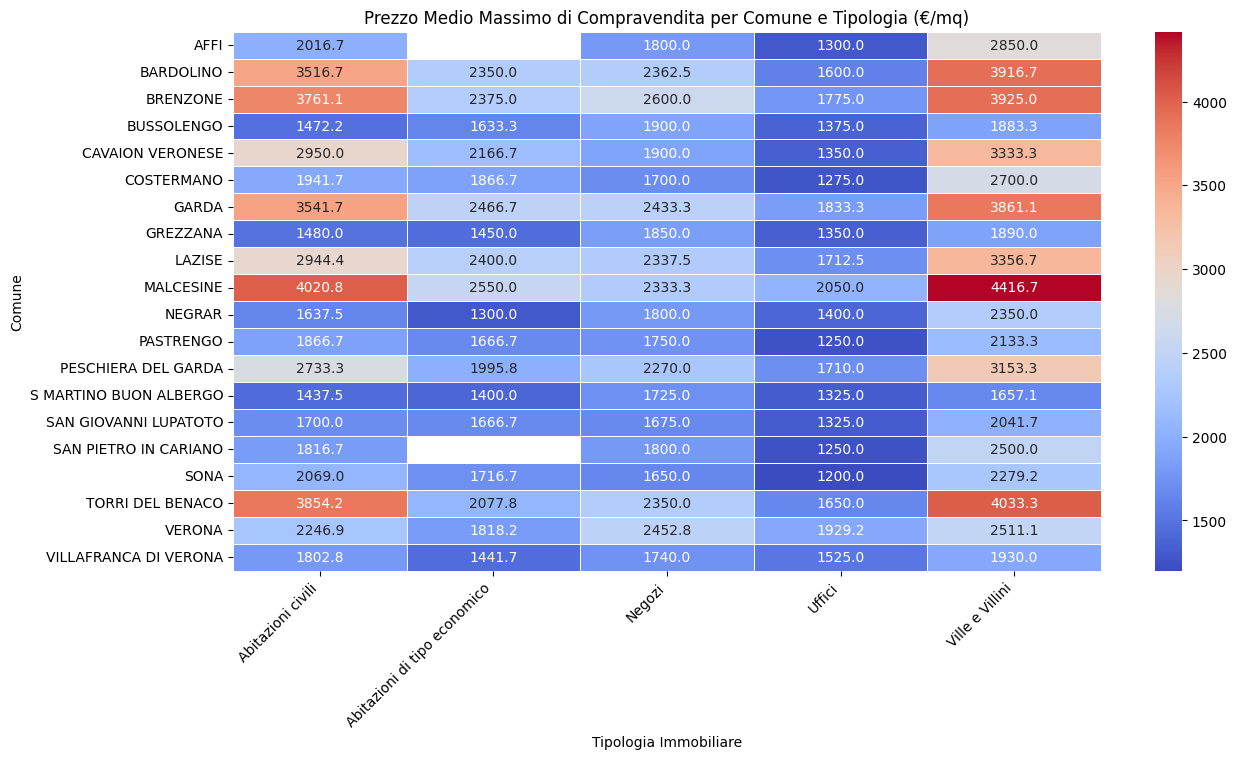

In [20]:
# Filtriamo solo i dati validi
df_filtrato = df_unificato.dropna(subset=["compr_max", "comune_descrizione_x", "descr_tipologia"])

# Selezioniamo solo i 20 comuni con i prezzi medi più alti
top_comuni = df_filtrato.groupby("comune_descrizione_x")["compr_max"].mean().nlargest(20).index
df_top = df_filtrato[df_filtrato["comune_descrizione_x"].isin(top_comuni)]

# Selezioniamo solo le 5 tipologie più comuni
top_tipologie = df_top["descr_tipologia"].value_counts().nlargest(5).index
df_top = df_top[df_top["descr_tipologia"].isin(top_tipologie)]

# Creazione di una tabella pivot per la heatmap
pivot_heatmap = df_top.pivot_table(
    index="comune_descrizione_x", 
    columns="descr_tipologia", 
    values="compr_max", 
    aggfunc="mean"
)

# Grafico Heatmap migliorato
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_heatmap, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("Prezzo Medio Massimo di Compravendita per Comune e Tipologia (€/mq)")
plt.xlabel("Tipologia Immobiliare")
plt.ylabel("Comune")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()



## Test del modello